### Exercises: 
1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention 
(i.e. whether they leave the company or continue to work)
2. Plot bar charts showing impact of employee salaries on retention
3. Plot bar charts showing corelation between department and employee retention
4. Now build logistic regression model using variables that were narrowed down in step 1
5. Measure the accuracy of the model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
df = pd.read_csv('hr_comma_sep.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# 1. Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention  (i.e. whether they leave the company or continue to work)

In [3]:
left = df[df.left==1]
retained = df[df.left==0]
left.shape, retained.shape

((3571, 10), (11428, 10))

In [4]:
retained = df[df.left==0]
retained

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2000,0.58,0.74,4,215,3,0,0,0,sales,low
2001,0.82,0.67,2,202,3,0,0,0,sales,low
2002,0.45,0.69,5,193,3,0,0,0,sales,low
2003,0.78,0.82,5,247,3,0,0,0,sales,low
2004,0.49,0.60,3,214,2,0,0,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14206,0.90,0.55,3,259,10,1,0,1,management,high
14207,0.74,0.95,5,266,10,0,0,1,management,high
14208,0.85,0.54,3,185,10,0,0,1,management,high
14209,0.33,0.65,3,172,10,0,0,1,marketing,high


## 1.1.

In [5]:
df.groupby('left').mean(numeric_only=True)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.666810,0.715473,3.786664,199.060203,3.380032,0.175009,0.026251
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


From above table we can draw following conclusions,
1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.44) in employees leaving the firm vs the retained ones(0.66)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

## 1.2. Plot bar charts showing impact of employee salaries on retention

left       0     1
salary            
high    1155    82
low     5144  2172
medium  5129  1317


<Axes: xlabel='salary'>

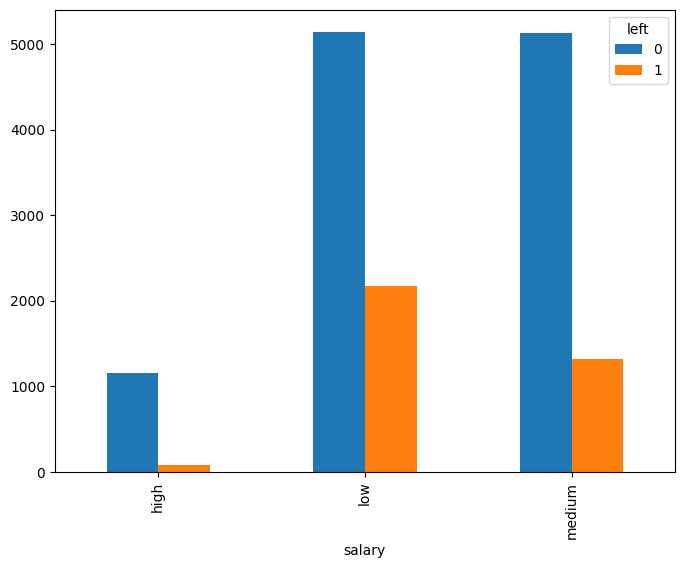

In [6]:
ct1 = pd.crosstab(df.salary, df.left)
print(ct1)
ct1.plot(kind='bar', figsize=(8,6))

Above bar chart shows employees with high salaries are likely to not leave the company

## 1.3. Plot bar charts showing corelation between department and employee retention

left            0     1
Department             
IT            954   273
RandD         666   121
accounting    563   204
hr            524   215
management    539    91
marketing     655   203
product_mng   704   198
sales        3126  1014
support      1674   555
technical    2023   697


<Axes: xlabel='Department'>

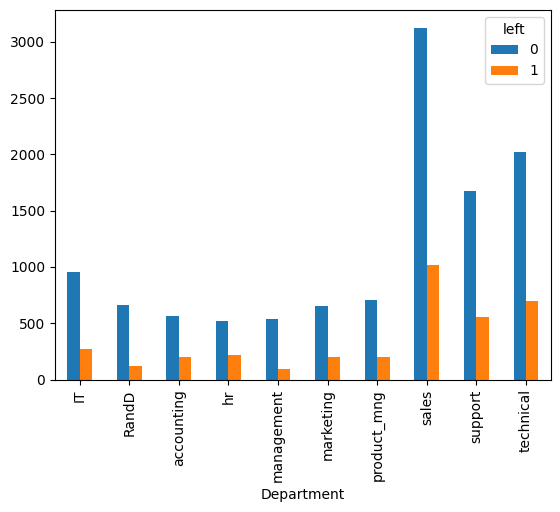

In [7]:
ct2 = pd.crosstab(df.Department, df.left)
print(ct2)
ct2.plot(kind='bar')

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

# 2. Now build logistic regression model using variables that were narrowed down in Step 1

In [8]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [9]:
final_df = df[['satisfaction_level', 'average_montly_hours', 'promotion_last_5years', 'salary', 'left']]
final_df

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1
...,...,...,...,...,...
14994,0.40,151,0,low,1
14995,0.37,160,0,low,1
14996,0.37,143,0,low,1
14997,0.11,280,0,low,1


In [10]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   average_montly_hours   14999 non-null  int64  
 2   promotion_last_5years  14999 non-null  int64  
 3   salary                 14999 non-null  object 
 4   left                   14999 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 586.0+ KB


In [11]:
final_df.describe()

,satisfaction_level,average_montly_hours,promotion_last_5years,left
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,201.050337,0.021268,0.238083
std,0.248631,49.943099,0.144281,0.425924
min,0.090000,96.000000,0.000000,0.000000
25%,0.440000,156.000000,0.000000,0.000000
50%,0.640000,200.000000,0.000000,0.000000
75%,0.820000,245.000000,0.000000,0.000000
max,1.000000,310.000000,1.000000,1.000000


In [12]:
scaler = MinMaxScaler()
final_df[['average_montly_hours']] = scaler.fit_transform(final_df[['average_montly_hours']])

C:\Users\Admin\AppData\Local\Temp\ipykernel_1976\2267455990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df[['average_montly_hours']] = scaler.fit_transform(final_df[['average_montly_hours']])


In [13]:
final_df = pd.get_dummies(final_df, drop_first=True, dtype='int16')
final_df

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_low,salary_medium
0,0.38,0.285047,0,1,1,0
1,0.80,0.775701,0,1,0,1
2,0.11,0.822430,0,1,0,1
3,0.72,0.593458,0,1,1,0
4,0.37,0.294393,0,1,1,0
...,...,...,...,...,...,...
14994,0.40,0.257009,0,1,1,0
14995,0.37,0.299065,0,1,1,0
14996,0.37,0.219626,0,1,1,0
14997,0.11,0.859813,0,1,1,0


In [14]:
X = final_df.drop('left', axis=1)
Y = final_df.left
X.shape, Y.shape

((14999, 5), (14999,))

In [15]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.9, random_state=2)
X_train.shape, X_test.shape

((13499, 5), (1500, 5))

In [16]:
np.unique(Y_train, return_counts=True)

(array([0, 1], dtype=int64), array([10282,  3217], dtype=int64))

In [17]:
final_df.left.value_counts()

left
0    11428
1     3571
Name: count, dtype: int64

##### ==> AN IMBALANCED DATASET

In [18]:
LoR = LogisticRegression()
LoR.fit(X_train,Y_train)

LogisticRegression()

In [19]:
Yp_test = LoR.predict(X_test)

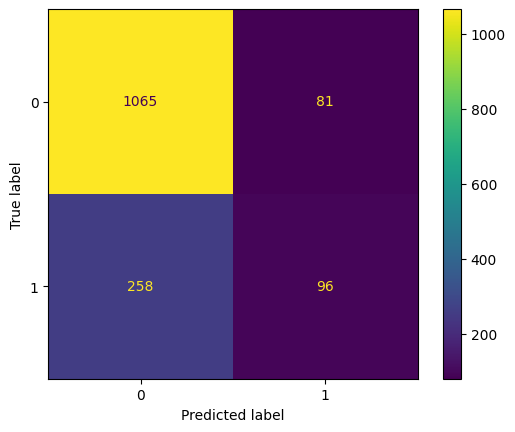

In [20]:
cm = confusion_matrix(Y_test, Yp_test)
cm = ConfusionMatrixDisplay(cm)
cm.plot()

In [21]:
cr = classification_report(Y_test, Yp_test)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1146
           1       0.54      0.27      0.36       354

    accuracy                           0.77      1500
   macro avg       0.67      0.60      0.61      1500
weighted avg       0.74      0.77      0.74      1500



---

# Ensemble + Under-sampling

In [22]:
training_set = pd.concat([X_train, Y_train], axis=1)
training_set

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,left
5861,0.14,0.299065,0,0,1,0
12652,0.09,0.906542,0,0,1,1
6626,0.40,0.144860,0,1,0,0
10646,0.53,0.677570,0,1,0,0
6278,0.69,0.196262,0,1,0,0
...,...,...,...,...,...,...
11798,0.61,0.228972,1,0,1,0
13896,0.41,0.214953,0,1,0,0
6637,0.88,0.350467,0,0,1,0
2575,0.89,0.799065,0,1,0,0


In [23]:
training_set.left.value_counts()

left
0    10282
1     3217
Name: count, dtype: int64

In [24]:
left = training_set[training_set.left == 1]
retained = training_set[training_set.left == 0]
left.shape, retained.shape

((3217, 6), (10282, 6))

In [25]:
retained_1 = retained[0:len(left)]
retained_2 = retained[len(left):len(left)*2]
retained_3 = retained[len(left)*2:len(left)*3]
retained_1.shape

(3217, 6)

In [26]:
underSampling_1 = pd.concat([left, retained_1], axis=0)
underSampling_2 = pd.concat([left, retained_2], axis=0) 
underSampling_3 = pd.concat([left, retained_3], axis=0)
underSampling_1

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_low,salary_medium,left
12652,0.09,0.906542,0,0,1,1
12075,0.11,0.981308,0,0,1,1
14577,0.10,0.757009,0,1,0,1
14623,0.45,0.196262,0,0,1,1
506,0.83,0.761682,0,0,1,1
...,...,...,...,...,...,...
2914,0.65,0.677570,0,0,1,0
2250,0.16,0.757009,0,0,1,0
2963,0.72,0.663551,0,0,1,0
4233,0.88,0.598131,0,0,0,0


In [27]:
def predict(df_underSampling, X_test):
    X_train = df_underSampling.drop('left', axis=1)
    Y_train = df_underSampling.left

    Log_R = LogisticRegression()
    Log_R.fit(X_train, Y_train)
    
    Yp_test = Log_R.predict(X_test)
    return Yp_test

In [28]:
y1 = predict(underSampling_1, X_test)
y2 = predict(underSampling_2, X_test)
y3 = predict(underSampling_3, X_test)
y1, y2, y3

(array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 1], dtype=int64),
 array([0, 1, 0, ..., 0, 0, 1], dtype=int64))

In [29]:
Yp2_test = []
for i in range(len(y1)):
    total = y1[i] + y2[i] + y3[i]
    if total >= 2:
        Yp2_test.append(1)
    else:
        Yp2_test.append(0)

(<sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x207134cffd0>,
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x20729284350>)

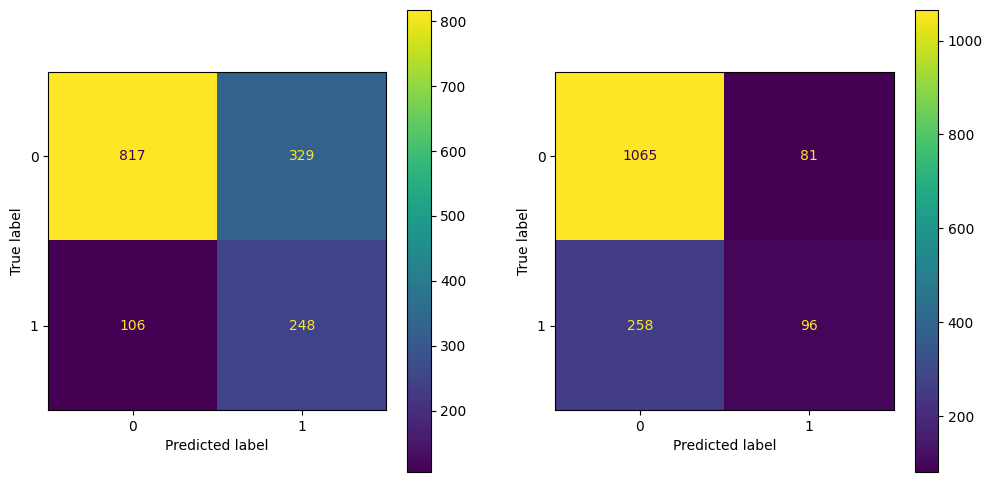

In [32]:
cm2 = confusion_matrix(Y_test, Yp2_test)
cm2 = ConfusionMatrixDisplay(cm2)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
cm2.plot(ax=axes[0]), cm.plot(ax=axes[1])

In [31]:
cr2 = classification_report(Y_test, Yp2_test)
print(cr2)
print('-'*100)
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1146
           1       0.43      0.70      0.53       354

    accuracy                           0.71      1500
   macro avg       0.66      0.71      0.66      1500
weighted avg       0.78      0.71      0.73      1500

----------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      1146
           1       0.54      0.27      0.36       354

    accuracy                           0.77      1500
   macro avg       0.67      0.60      0.61      1500
weighted avg       0.74      0.77      0.74      1500

